In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Тепловая карта

In [2]:
flights_long = sns.load_dataset("flights")

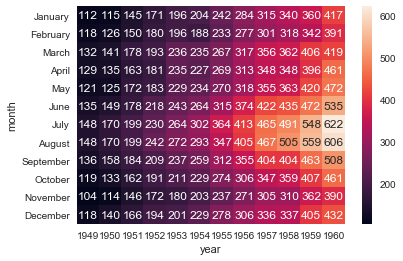

In [3]:
sns.set()

flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# annot - добавляет аннотацию (цифры на карте), fmt - форматирует
sns.heatmap(flights, annot=True, fmt="d")

### Задание
Загрузите стандартный датасет "titanic" из seaborn. Посчитайте корреляцию между признаками и постройте тепловую карту для матрицы корреляций.

In [4]:
titanic =

SyntaxError: invalid syntax (<ipython-input-4-7aff6a32e577>, line 1)

# Анализ графов в Python
Тетрадка посвящена работе с графами в питоне на примере библиотеки NetworkX.

## Обзор NetworkX

NetworkX --- это питонячая библиотека, предназначенная для создания, обработки и изучения сложных сетей (aka графов). В отличие от других библиотек, которые вы можете встретить в сети (igraph, graphviz etc), она полностью написана на Python, благодаря чему ставится через Anaconda и не требует предустановки других пакетов.

Материал сильно опирается на лекцию по [введению в NetworkX](https://www.cl.cam.ac.uk/~cm542/teaching/2010/stna-pdfs/stna-lecture8.pdf).

In [6]:
import networkx as nx #импортируем библиотеку для работы с сетями

import numpy as np #подгружаем библиотеку нумпай
import pandas as pd #подгружаем библиотеку пандас

import matplotlib.pyplot as plt #библиотека для графиков
%matplotlib inline
#чтобы графики сразу рисовались

Пример создания простого графа:

In [7]:
# Создаём заготовку графа, в которую будут добавляться вершины и рёбра.
g = nx.Graph()
#пока еще у этого графа нет ни вершин, ни ребер, он совсем пустой

Добавление вершин:

In [8]:
# вершину графа можно называть как строкой, так и числом.
g.add_node(1) #добавляем вершину, которая называется 1
g.add_node('n') #добавляем вершину, которая называется n

# добавление нескольких вершин сразу
g.add_nodes_from([2, 3]) #добавляем вершины c именами 2 и 3

#Важно! Пока эти вершины еще не соединены, они совсем-совсем одиноки

Добавление рёбер:

In [9]:
# Указываем две вершины, которые надо соединить.
g.add_edge(1, 'n')

# Добавление нескольких рёбер между указанными вершинами.
g.add_edges_from([(1, 2), (1, 3)])

# Добавление сразу двух вершин.
# Создаются и новые вершины, и ребро между ними!
g.add_edge('a', 'b', weight=0.1)
g.add_edge('b', 'c', weight=1.5)
g.add_edge('a', 'c', weight=1)
g.add_edge('c', 'd', weight=0.2)
g.add_edge('c', 153, weight=1.2)

Визуализация (при повторном запуске ячейки картинка может меняться):

Graph nodes: [1, 'n', 2, 3, 'a', 'b', 'c', 'd', 153]


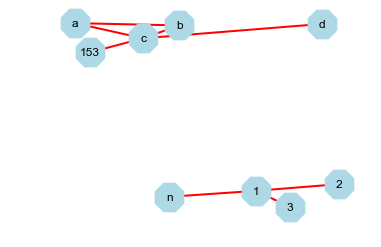

In [20]:
nx.draw_networkx(g, node_color='lightblue', node_shape ='8', node_size =1000, width =2, edge_color='red') #просим питон нарисовать граф g, и раскрасить вершины графа в цвет
plt.axis('off') #убираем координатную плоскость
#so^>v<dph8
print('Graph nodes:', g.nodes()) #просим питон вывести список наших вершин

In [23]:
g.edges(data=True)

EdgeDataView([(1, 'n', {}), (1, 2, {}), (1, 3, {}), ('a', 'b', {'weight': 0.1}), ('a', 'c', {'weight': 1}), ('b', 'c', {'weight': 1.5}), ('c', 'd', {'weight': 0.2}), ('c', 153, {'weight': 1.2})])

Вывод кратчайшего (или минимизирующего затраты) пути от одной вершины до другой:

In [21]:
# Без учёта весов.
print(nx.shortest_path(g, 'b', 'd'))

# С учётом весов: теперь за переход по каждому ребру вносится плата.
print(nx.shortest_path(g, 'b', 'd', weight='weight'))

['b', 'c', 'd']
['b', 'a', 'c', 'd']


Точно так же, как ребру приписывался численный параметр `weight`, вершине можно приписывать любые характеристики:

In [22]:
g.add_node('node',
           date='06.05.2018',
           any_name='some information') #добавили вершину node, у которой прописали параметры
g.node['node'] #а теперь сослались на вершину node, чтобы узнать, какие у нее есть параметры

{'date': '06.05.2018', 'any_name': 'some information'}

In [24]:
g.nodes(data=True)

NodeDataView({1: {}, 'n': {}, 2: {}, 3: {}, 'a': {}, 'b': {}, 'c': {}, 'd': {}, 153: {}, 'node': {'date': '06.05.2018', 'any_name': 'some information'}})

Т.е. каждый узел графа можно воспринимать как питонячий словарь `dict` с произвольными ключами и значениями.

Фактически весь граф это просто словарь, где ключ -- номер вершины, значение -- набор вершин, соседних к ней:

In [27]:
for key, val in g.adj.items(): #хотим теперь посмотреть для графа g список вершин, с их связями.
    print(key, val)

1 {'n': {}, 2: {}, 3: {}}
n {1: {}}
2 {1: {}}
3 {1: {}}
a {'b': {'weight': 0.1}, 'c': {'weight': 1}}
b {'a': {'weight': 0.1}, 'c': {'weight': 1.5}}
c {'b': {'weight': 1.5}, 'a': {'weight': 1}, 'd': {'weight': 0.2}, 153: {'weight': 1.2}}
d {'c': {'weight': 0.2}}
153 {'c': {'weight': 1.2}}
node {}


In [26]:
g['c'] # посмотрим, с какими вершинами связана вершина c

AtlasView({'b': {'weight': 1.5}, 'a': {'weight': 1}, 'd': {'weight': 0.2}, 153: {'weight': 1.2}})

Можно вывести и другое традиционное представление графа в виде матрицы смежности:

In [28]:
nx.adjacency_matrix(g).todense()#выведем матрицу смежности для графа

matrix([[0. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0.1, 1. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0.1, 0. , 1.5, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 1. , 1.5, 0. , 0.2, 1.2, 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 1.2, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [32]:
nx.adjacency_matrix(g)

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

Получение числа вершин графа:

In [33]:
g.number_of_nodes() #узнаем, сколько всего вершин в графе g

10

In [34]:
len(g) #так это тоже можно сделать

10

Числа рёбер:

In [35]:
g.number_of_edges() #узнать количество ребер

8

Совокупная информация:

In [36]:
print(nx.info(g)) #полная информация для графа

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 8
Average degree:   1.6000


При работе с графами часто бывает полезным получить доступ ко всем вершинам / рёбрам, что позволяет сделать метод `.nodes()` / `.edges()`:

In [37]:
g.nodes(data=True) #Если false, то список вершин, если  True, то еще и данные для вершин

NodeDataView({1: {}, 'n': {}, 2: {}, 3: {}, 'a': {}, 'b': {}, 'c': {}, 'd': {}, 153: {}, 'node': {'date': '06.05.2018', 'any_name': 'some information'}})

In [38]:
g.edges(data=True)

EdgeDataView([(1, 'n', {}), (1, 2, {}), (1, 3, {}), ('a', 'b', {'weight': 0.1}), ('a', 'c', {'weight': 1}), ('b', 'c', {'weight': 1.5}), ('c', 'd', {'weight': 0.2}), ('c', 153, {'weight': 1.2})])

In [40]:
for node in g.nodes():
    print(node, g.degree(node))

1 3
n 1
2 1
3 1
a 2
b 2
c 4
d 1
153 1
node 0


In [41]:
g.degree('a')

2

---

Закодим простой граф.

Создайте граф, содержащий $20$ вершин с именами $0, 1, \ldots, 19$:

In [56]:
my_g = nx.Graph()
my_g.add_nodes_from(range(20))

print(nx.info(my_g))

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 0
Average degree:   0.0000


Добавьте рёбра, соединяющие вершины через одну ($0$ и $2$, $1$ и $3$, ..., $18$ и $0$, $19$ и $1$):

In [62]:
for i in range(20):
    my_g.add_edge(i, (i+2)%20)
print(nx.info(my_g))

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 20
Average degree:   2.0000


Нарисуйте полученный граф:

(-1.1246677295572707,
 1.048949474727245,
 -0.8306012832047384,
 0.9149506178396115)

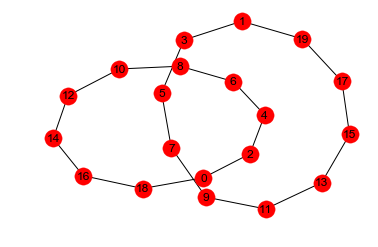

In [139]:
nx.draw_networkx(my_g)
plt.axis('off')

## Реальные данные

Считаем данные о станциях московского метрополитена в 2014 году:

In [142]:
metro_data = pd.read_csv('metro_2014_pairwise.csv')

metro_data.head()

,End station,Start station
0,Сокольническая_Преображенская_площадь,Сокольническая_Черкизовская
1,Сокольническая_Сокольники,Сокольническая_Преображенская_площадь
2,Сокольническая_Красносельская,Сокольническая_Сокольники
3,Сокольническая_Комсомольская,Сокольническая_Красносельская
4,Сокольническая_Красные_ворота,Сокольническая_Комсомольская


Формат такой: две станции записаны в одной строке, если между ними есть перегон.

Общее число станций:

In [143]:
len(metro_data['Start station'].unique())

194

Загрузим данные в граф из подготовленной таблицы:

- вершинами будут названия станций
- ребро между двумя станциями проводится, если между станциями есть перегон

In [144]:
metro_graph = nx.from_pandas_edgelist(metro_data, source='Start station', target='End station')

# Указываем, что направление перегона между станциями нас не интересует.
# (как правило, можем поехать в обе стороны)
metro_graph = nx.to_undirected(metro_graph)

print(nx.info(metro_graph))

Name: 
Type: GraphView
Number of nodes: 194
Number of edges: 229
Average degree:   2.3608


Нарисуем граф и сохраним его во внешний файл (изменение размера картинки и сохранение делается средствами matplotlib'а):

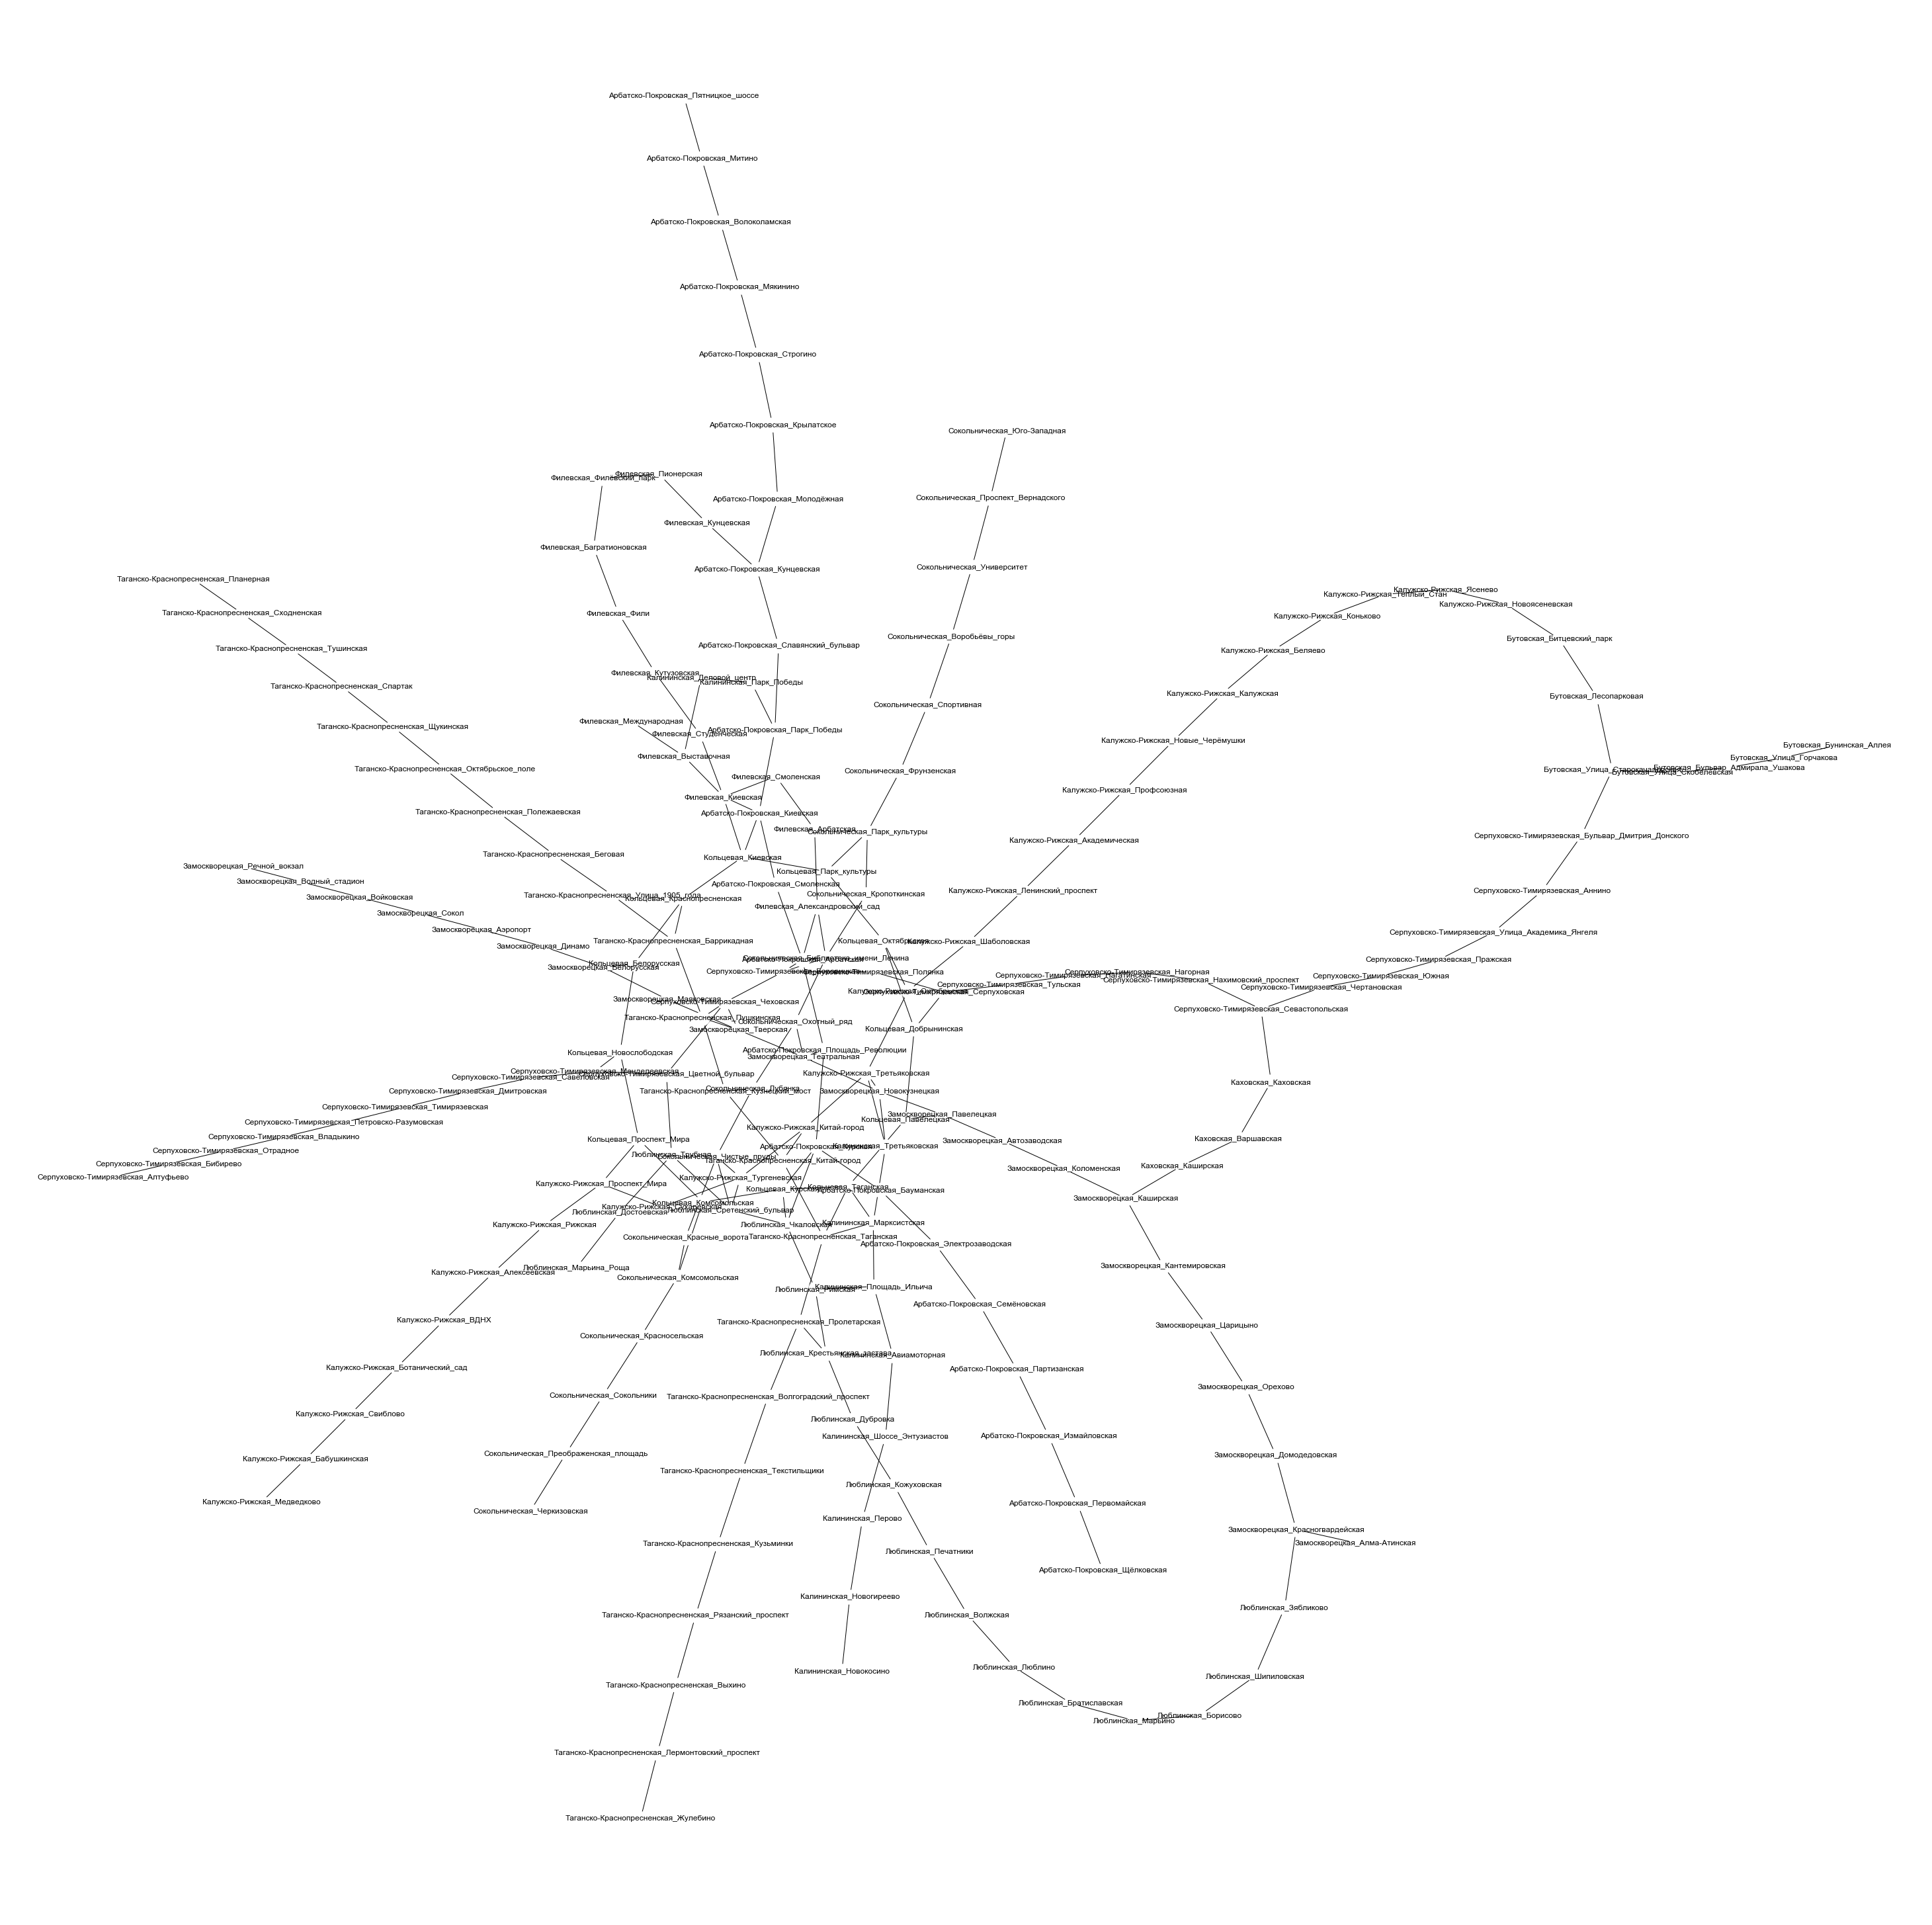

In [150]:
plt.figure(figsize=(40, 40)) 

# Можно поэкспериментировать со способом отрисовки: помимо draw_networkx есть такие:
# draw_circular, draw_spectral, draw_random, etc.
nx.draw_kamada_kawai(metro_graph, with_labels=True, node_color='white', node_size=500)

plt.savefig('metro_2014.png', bbox_inches='tight')

Все степени вершин доступны в поле `.degree`, которое похоже по структуре на словарь из пар Имя_вершины: Степень_вершины. Чтобы можно было работать, как со словарём, достаточно навесить преобразование `dict()`:

In [151]:
dict(metro_graph.degree())

{'Сокольническая_Черкизовская': 1,
 'Сокольническая_Преображенская_площадь': 2,
 'Сокольническая_Сокольники': 2,
 'Сокольническая_Красносельская': 2,
 'Сокольническая_Комсомольская': 3,
 'Сокольническая_Красные_ворота': 2,
 'Кольцевая_Комсомольская': 3,
 'Сокольническая_Чистые_пруды': 4,
 'Сокольническая_Лубянка': 3,
 'Калужско-Рижская_Тургеневская': 4,
 'Люблинская_Сретенский_бульвар': 4,
 'Сокольническая_Охотный_ряд': 3,
 'Таганско-Краснопресненская_Кузнецкий_мост': 3,
 'Сокольническая_Библиотека_имени_Ленина': 5,
 'Замоскворецкая_Театральная': 4,
 'Сокольническая_Кропоткинская': 2,
 'Арбатско-Покровская_Арбатская': 5,
 'Филевская_Александровский_сад': 3,
 'Серпуховско-Тимирязевская_Боровицкая': 4,
 'Сокольническая_Парк_культуры': 3,
 'Сокольническая_Фрунзенская': 2,
 'Кольцевая_Парк_культуры': 3,
 'Сокольническая_Спортивная': 2,
 'Сокольническая_Воробьёвы_горы': 2,
 'Сокольническая_Университет': 2,
 'Сокольническая_Проспект_Вернадского': 2,
 'Сокольническая_Юго-Западная': 1,
 'Замос

Постройте гистограмму степеней вершин. Подпишите оси и название графика.

Text(0,0.5,'stations count')

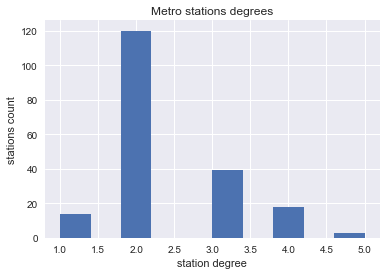

In [154]:
degrees = dict(metro_graph.degree())
plt.hist(list(degrees.values()))
plt.title('Metro stations degrees')
plt.xlabel('station degree')
plt.ylabel('stations count')

Почему наибольшее число вершин имеет степень $2$?

Выведите станцию, которая соединена с наибольшим числом станций (т.е. вершина станции имеет наибольшую степень). Для этого понадобится пройтись циклом по всем парам вершина-степень и запомнить пару с максимальной степенью.

In [158]:
max_value = 0
max_station = ''
for key, value in degrees.items():
    if value > max_value:
        max_value = value
        max_station = key
print(max_station, max_value)

Сокольническая_Библиотека_имени_Ленина 5


In [173]:
max_value = max(degrees.values())
max_station = []
for key, value in degrees.items():
    if value == max_value:
        max_station.append(key)

print('\n'.join(max_station), max_value, sep = '\n')

Сокольническая_Библиотека_имени_Ленина
Арбатско-Покровская_Арбатская
Филевская_Киевская
5


In [170]:
max(degrees.items(), key=lambda x: x[1])

('Сокольническая_Библиотека_имени_Ленина', 5)

С помощью `pandas` выведите станции, на которые можно попасть напрямую от найденной (т.е. те, которые соединены с ней):

In [175]:
metro_data[metro_data['Start station'] == 'Сокольническая_Библиотека_имени_Ленина']

,End station,Start station
14,Сокольническая_Кропоткинская,Сокольническая_Библиотека_имени_Ленина
15,Арбатско-Покровская_Арбатская,Сокольническая_Библиотека_имени_Ленина
16,Филевская_Александровский_сад,Сокольническая_Библиотека_имени_Ленина
17,Серпуховско-Тимирязевская_Боровицкая,Сокольническая_Библиотека_имени_Ленина
241,Сокольническая_Охотный_ряд,Сокольническая_Библиотека_имени_Ленина


Библиотека NetworkX позволяет найти кратчайший путь между вершинами, по которому можно судить об их взаимном расположении:

In [176]:
nx.shortest_path(metro_graph, 'Сокольническая_Библиотека_имени_Ленина', 'Серпуховско-Тимирязевская_Боровицкая')

['Сокольническая_Библиотека_имени_Ленина',
 'Серпуховско-Тимирязевская_Боровицкая']

In [160]:
nx.shortest_path(metro_graph, 'Сокольническая_Библиотека_имени_Ленина', 'Серпуховско-Тимирязевская_Полянка')

['Сокольническая_Библиотека_имени_Ленина',
 'Серпуховско-Тимирязевская_Боровицкая',
 'Серпуховско-Тимирязевская_Полянка']

А ещё можно вывести кратчайшие пути до всех вершин от данной:

In [177]:
nx.single_source_shortest_path(metro_graph, 'Сокольническая_Библиотека_имени_Ленина')

{'Сокольническая_Библиотека_имени_Ленина': ['Сокольническая_Библиотека_имени_Ленина'],
 'Сокольническая_Охотный_ряд': ['Сокольническая_Библиотека_имени_Ленина',
  'Сокольническая_Охотный_ряд'],
 'Сокольническая_Кропоткинская': ['Сокольническая_Библиотека_имени_Ленина',
  'Сокольническая_Кропоткинская'],
 'Арбатско-Покровская_Арбатская': ['Сокольническая_Библиотека_имени_Ленина',
  'Арбатско-Покровская_Арбатская'],
 'Филевская_Александровский_сад': ['Сокольническая_Библиотека_имени_Ленина',
  'Филевская_Александровский_сад'],
 'Серпуховско-Тимирязевская_Боровицкая': ['Сокольническая_Библиотека_имени_Ленина',
  'Серпуховско-Тимирязевская_Боровицкая'],
 'Сокольническая_Лубянка': ['Сокольническая_Библиотека_имени_Ленина',
  'Сокольническая_Охотный_ряд',
  'Сокольническая_Лубянка'],
 'Замоскворецкая_Театральная': ['Сокольническая_Библиотека_имени_Ленина',
  'Сокольническая_Охотный_ряд',
  'Замоскворецкая_Театральная'],
 'Сокольническая_Парк_культуры': ['Сокольническая_Библиотека_имени_Ленин

Выделим некоторые кратчайшие пути цветом (при желании можно сохранить картинку, как и раньше).

In [162]:
# Функция для выделения цветом путей, пример использования ниже.
# https://github.com/jtorrents/pydata_bcn_NetworkX/blob/master/NetworkX_SNA_workshop_with_solutions.ipynb
def plot_paths(G, paths):
    plt.figure(figsize=(36, 36))
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=4000, node_color='white')
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G})
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos)
    for path in paths:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=3)
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

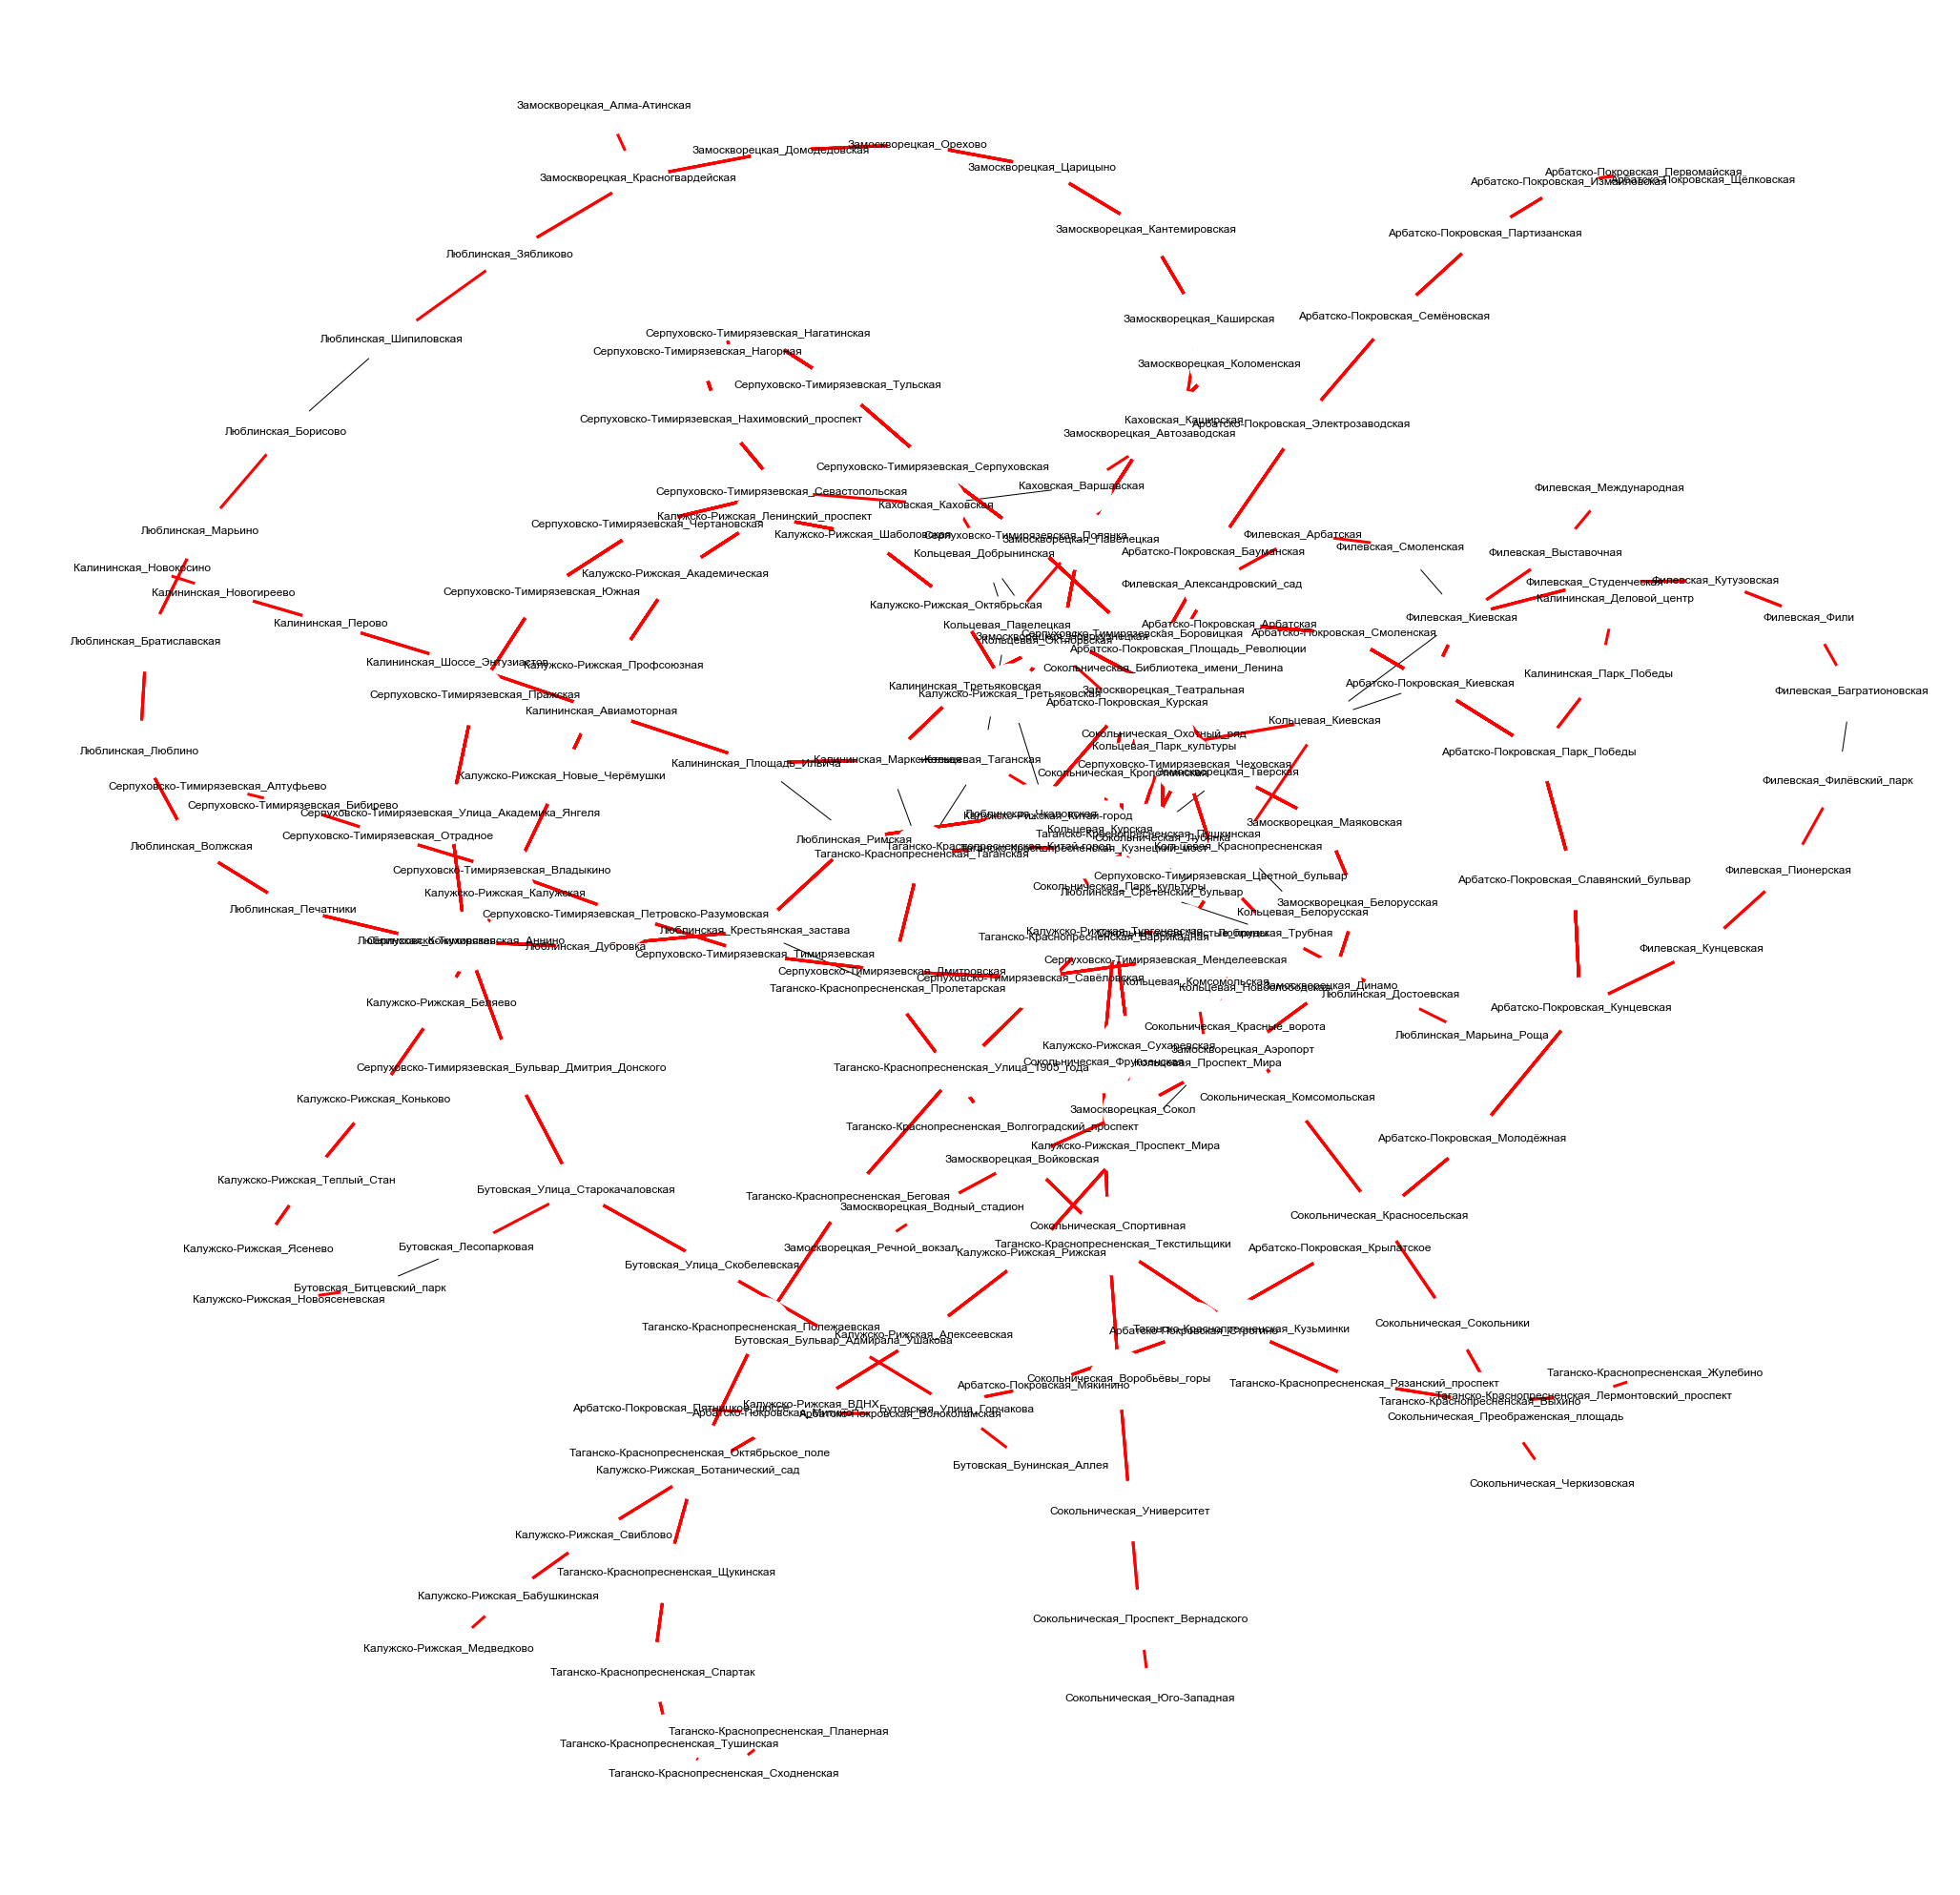

In [163]:
# Вывод кратчайших путей из одной вершины до всех остальных.
plot_paths(metro_graph, nx.single_source_shortest_path(metro_graph, 'Сокольническая_Библиотека_имени_Ленина').values())

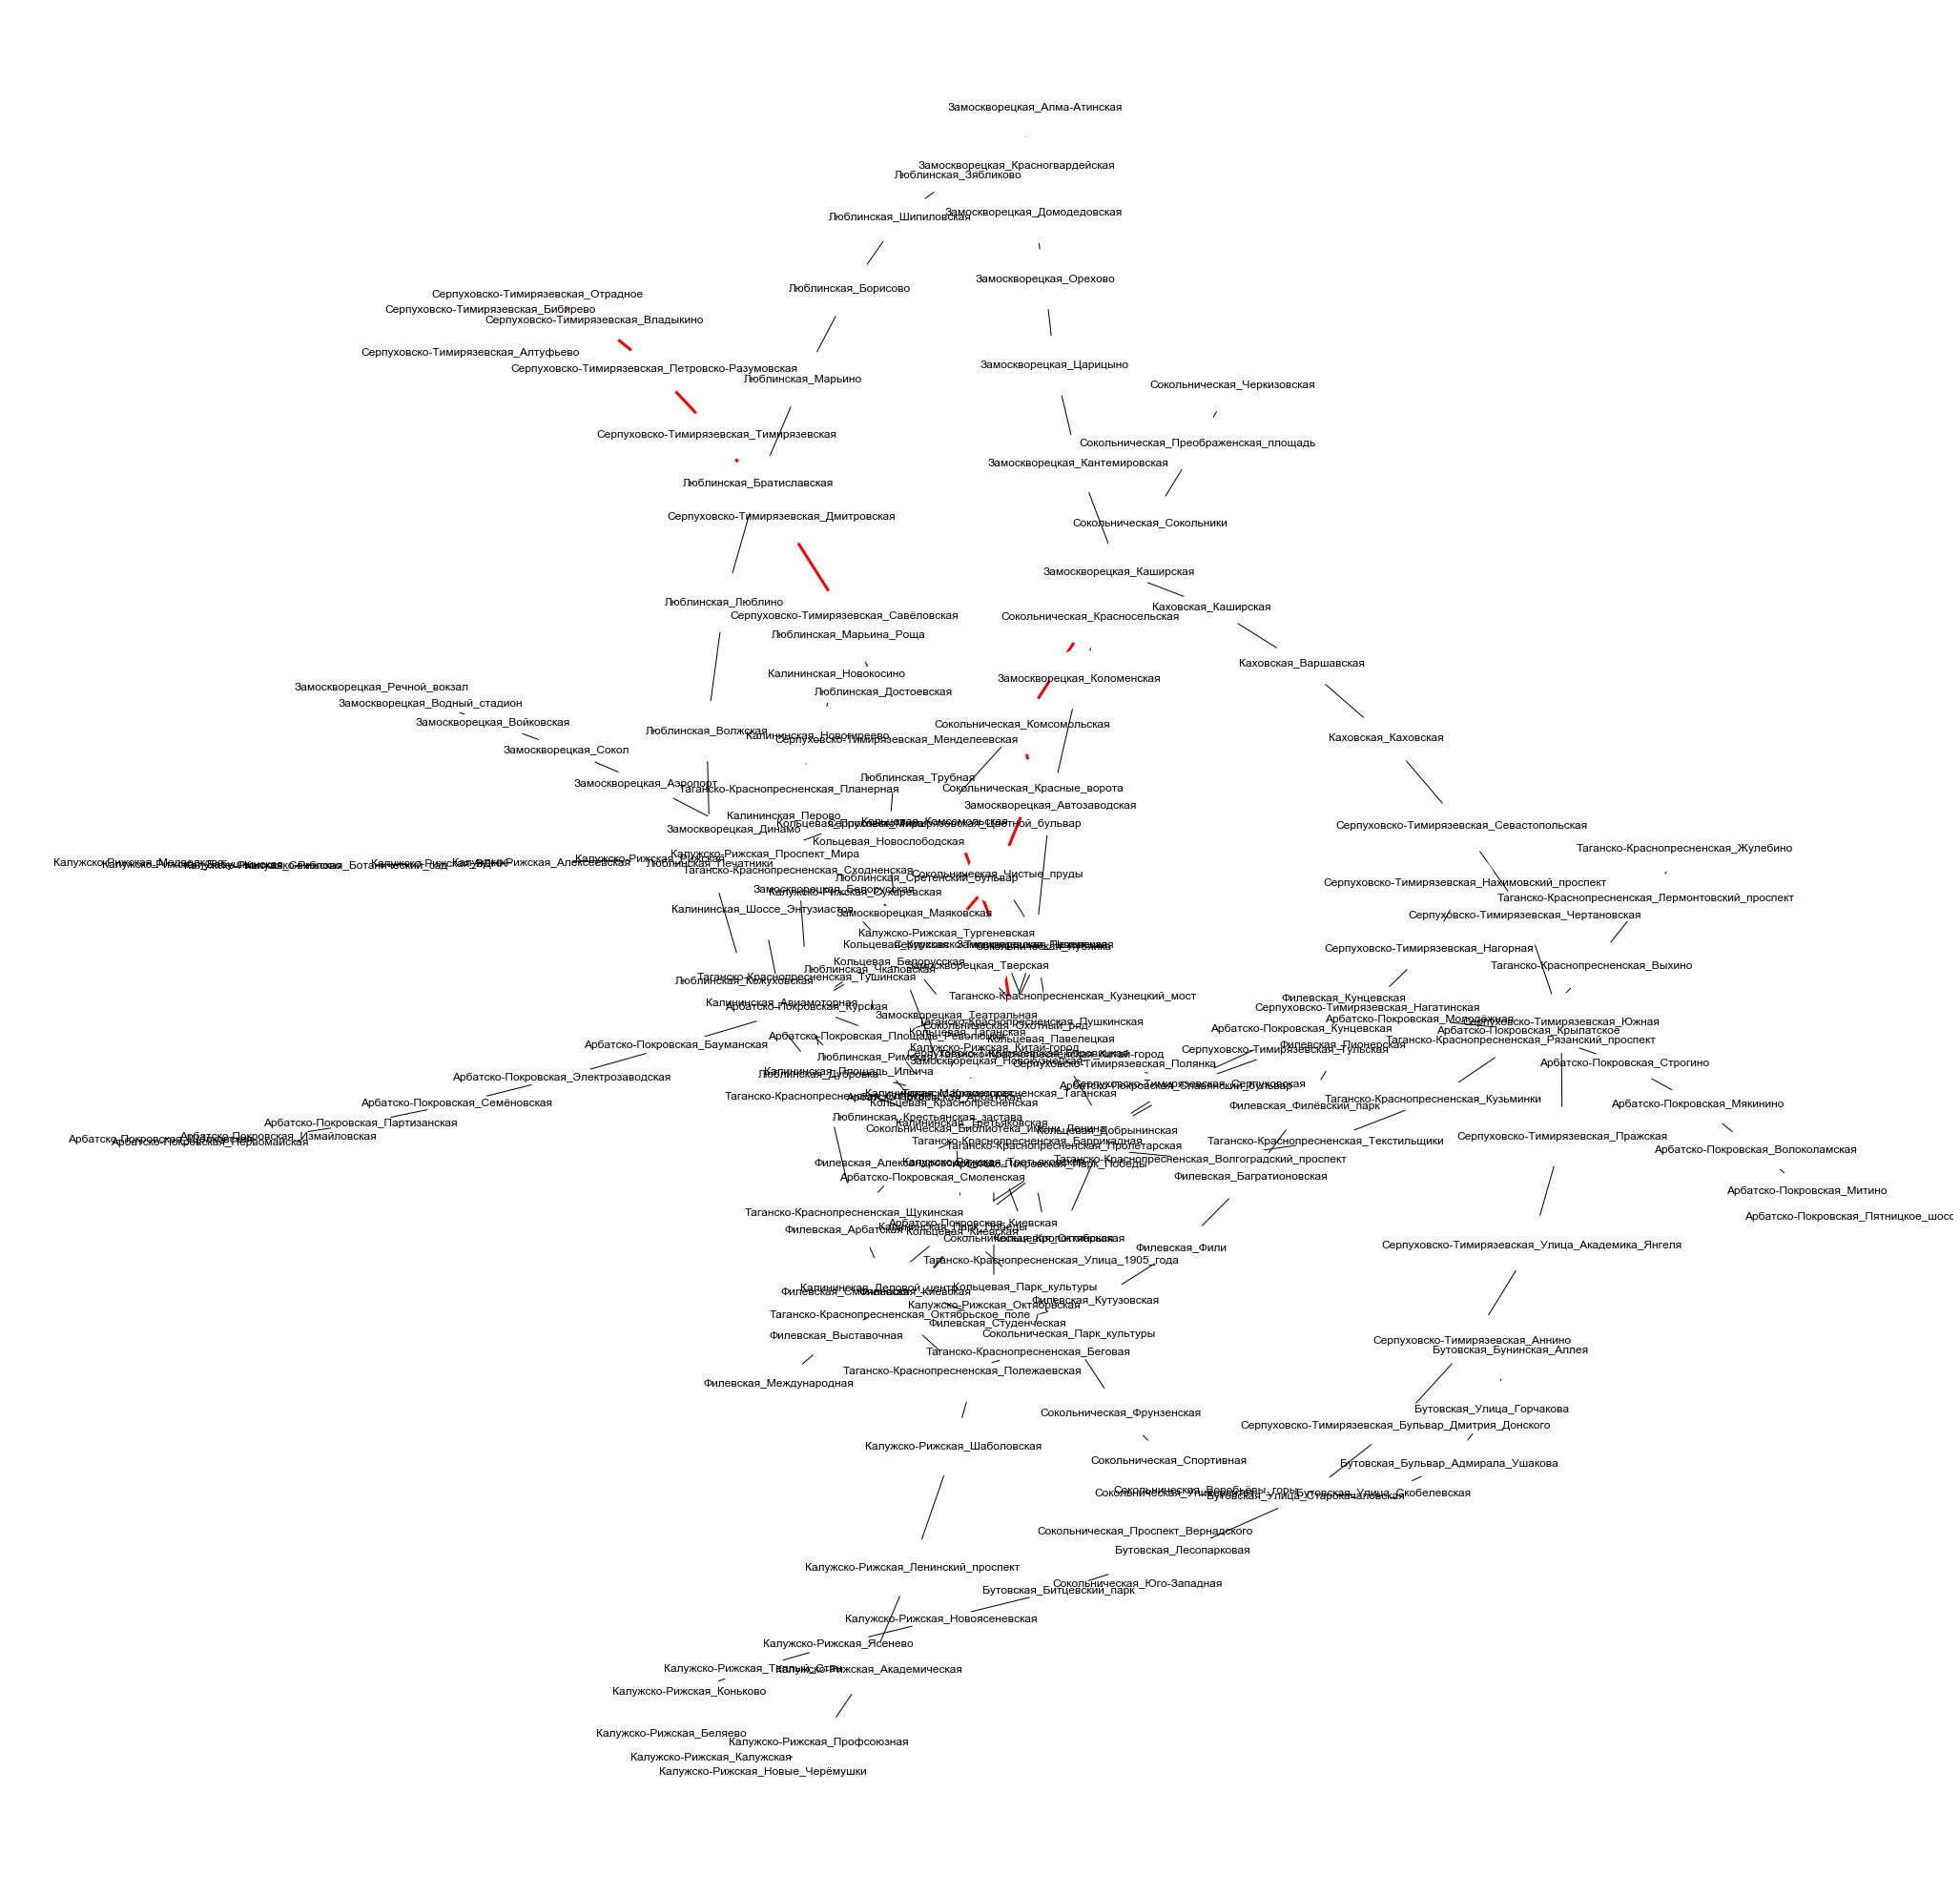

In [164]:
# Вывод нескольких кратчайших путей между конкретными парами вершин.
plot_paths(
    metro_graph,
    [
        nx.shortest_path(metro_graph, 'Сокольническая_Библиотека_имени_Ленина', 'Серпуховско-Тимирязевская_Алтуфьево'),
        nx.shortest_path(metro_graph, 'Сокольническая_Сокольники', 'Калужско-Рижская_Третьяковская')
    ]
)

### Bonus task: раскрашиваем граф метро
Конечно, можно нарисовать карту метро вот так:

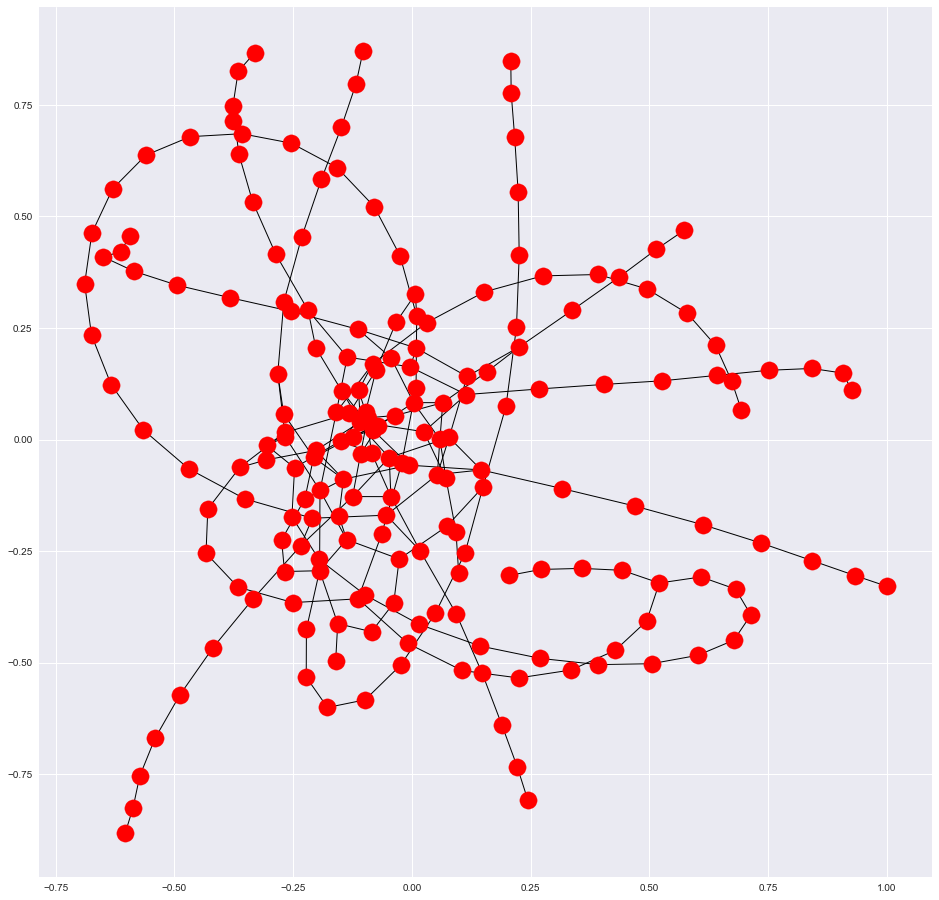

In [149]:
plt.figure(figsize=(16, 16)) 

nx.draw_networkx(metro_graph, with_labels=False)

А можно каждую вершину подкрасить цветом соответствующей ветки!

Для этого сначала создадим словарь с названиями цветов для каждой ветки (при желании поменяйте цвета на своё усмотрение, таблица с matplotlib'овскими цветами [тут](https://matplotlib.org/examples/color/named_colors)):

In [178]:
line_colors = {
    'Сокольническая': 'red',
    'Замоскворецкая': 'green',
    'Арбатско-Покровская': 'darkblue',
    'Филевская': 'blue',
    'Кольцевая': 'saddlebrown',
    'Калужско-Рижская': 'orangered',
    'Таганско-Краснопресненская': 'blueviolet',
    'Калининская': 'gold',
    'Серпуховско-Тимирязевская': 'gray',
    'Люблинская': 'lawngreen',
    'Каховская': 'palegreen',
    'Бутовская': 'lightsteelblue',
}

Ниже приведена функция, которая принимает название станции в формате `Имя-ветки_Имя-станции` (именно в таком формате хранятся названия в нашей таблице) и словарь вида `Имя-ветки: Цвет` (уже определённый `line_colors`). Функция возвращает цвет станции в соответствии с веткой, на которой она расположена.

In [179]:
def return_station_color(station, line_colors):
    for line in line_colors:
        if station.startswith(line):
            return line_colors[line]
    print('Something went wrong: couldn\'t find the line for station {}.\nReturn black color.'.format(station))
    return 'black'

Пример использования:

In [167]:
return_station_color('Калининская_Третьяковская', line_colors)

'gold'

In [168]:
return_station_color('Третьяковская', line_colors)

Something went wrong: couldn't find the line for station Третьяковская.
Return black color.


'black'

Создайте список цветов для наших вершин.

Для этого надо в цикле пройтись по всем вершинам в `metro_graph.nodes()` и добавить в список их цвета:

In [181]:
station_colors = []

for node in metro_graph.nodes():
    station_colors.append(return_station_color(node, line_colors))

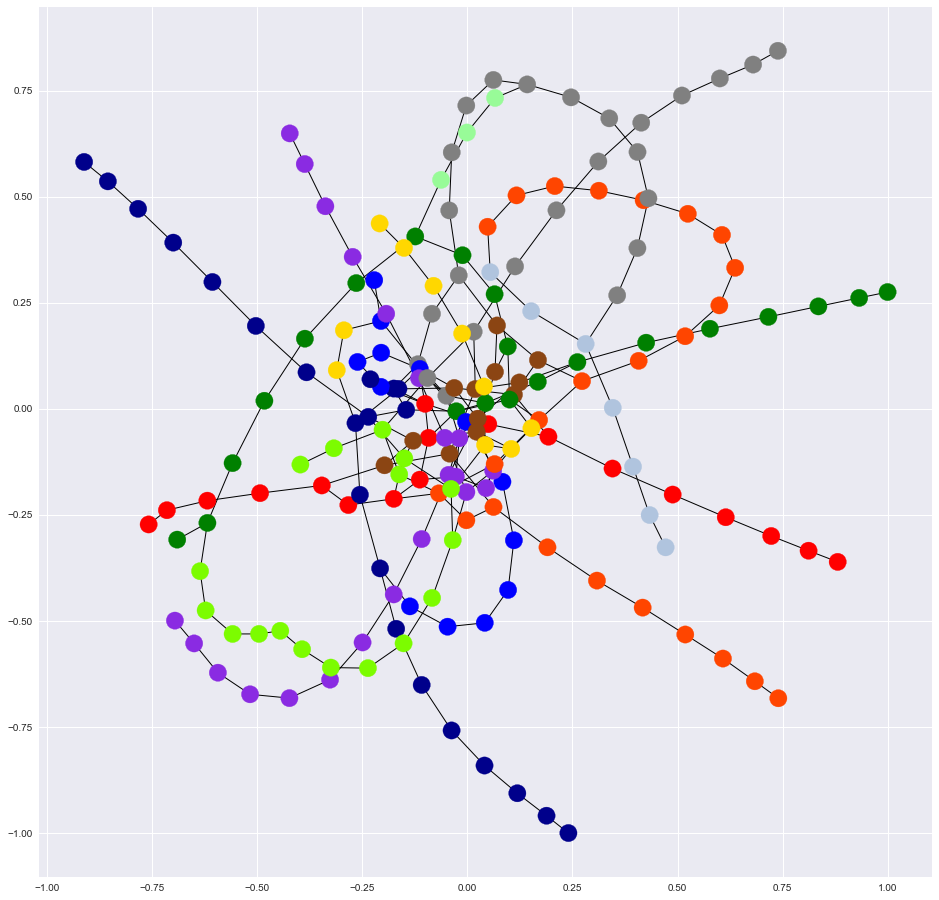

In [182]:
plt.figure(figsize=(16, 16)) 

# Опять же, можно поиграть со способами отрисовки.
nx.draw_networkx(metro_graph, with_labels=False, node_color=station_colors)